In [1]:
# ------------------------------------------------------------------------
#
# TITLE - investigate_sgr_orbit.ipynb
# AUTHOR - James Lane
# PROJECT - AST1501
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Investigate the Sgr orbits for doing a Dehnen evolution
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
%run ../../src/_helpers/basic_imports.py

## galpy
from galpy import orbit
from galpy import potential

# scipy
import scipy.signal

## Project-specific
sys.path.insert(0,'../../src/')
import ast1501.coordinates
import ast1501.potential

Basic imports:
numpy as np, pdb, sys, os, copy, glob, subprocess,
matplotlib.pyplot as plt, matplotlib as mpl, astropy.units as apu


In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Make potential

In [4]:
pot = potential.MWPotential2014

# Make the Sgr orbit

In [5]:
helio_vx = -11.1
helio_vy = 12.24 + 220
helio_vz = 7.25
helio_R = 8.2
helio_z = 0.023

sgr_x, sgr_y, sgr_z = [-25.2,2.5,-6.4]
sgr_u, sgr_v, sgr_w = [-221.3,-266.5,197.4]

sgr_x += helio_R
sgr_z += helio_z
sgr_vx = sgr_u + helio_vx
sgr_vy = sgr_v + helio_vy
sgr_vz = sgr_w + helio_vz

sgr_R = np.sqrt( np.square(sgr_x) + np.square(sgr_y) )
sgr_phi = ast1501.coordinates.calculate_galactic_azimuth(sgr_x,sgr_y,cw=True,lh=True)
sgr_vR = sgr_vx * np.cos(sgr_phi) + sgr_vy * np.sin(sgr_phi)
sgr_vT = -sgr_vx * np.sin(sgr_phi) + sgr_vy * np.cos(sgr_phi)

In [6]:
# Make the orbit
sgr_vxvv = [sgr_R*apu.kpc, sgr_vR*apu.km/apu.s, sgr_vT*apu.km/apu.s, 
            sgr_z*apu.kpc, sgr_vz*apu.km/apu.s, sgr_phi*apu.rad]
o_sgr = orbit.Orbit(sgr_vxvv)
o_sgr.turn_physical_on()
# No need to flip because backward time integration

In [7]:
# Declare times
n_snaps = 1000
t_orbit = -10 # Gyr, integrating backwards
times = np.linspace(0, t_orbit, n_snaps) * apu.Gyr

In [8]:
# Properties of the satellite
sgr_m = (14*(10**10))*apu.Msun
sgr_a = 13*apu.kpc
sgr_halo = potential.HernquistPotential(amp=sgr_m, a=sgr_a)
sgr_stlr = potential.HernquistPotential( (6.4*10**8)*apu.M_sun, 0.85*apu.kpc )
sgr_pot = [sgr_halo,sgr_stlr]
sgr_dynfric = potential.ChandrasekharDynamicalFrictionForce(
    GMs=sgr_m, rhm=(1+np.sqrt(2))*sgr_a, dens=pot)
pot_df = [pot,sgr_dynfric]

In [9]:
o_sgr.integrate(times, pot_df)

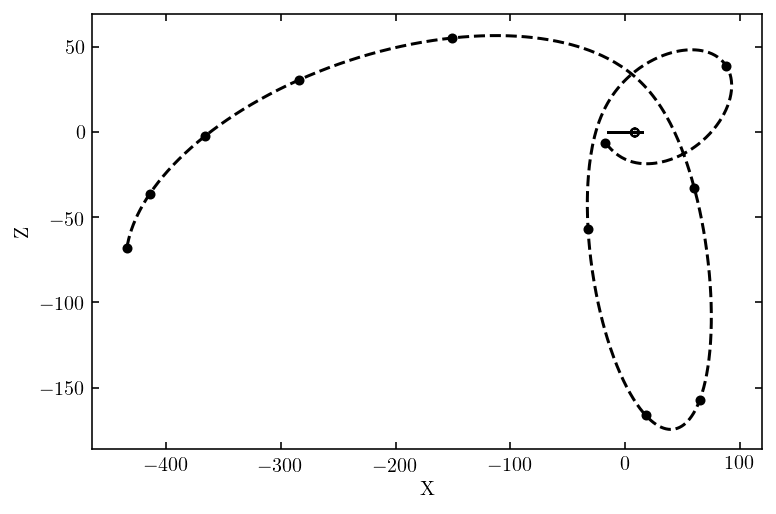

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( o_sgr.x(times).value, o_sgr.z(times).value, color='Black', linestyle='dashed' )
times_decimel = np.linspace(0,-10,num=11) * apu.Gyr
ax.scatter( o_sgr.x(times_decimel).value, o_sgr.z(times_decimel).value, color='Black', 
          s=16)
ax.plot([-15,15],[0,0], color='Black', linestyle='solid')
ax.scatter(8,0, marker=r'$\odot$', s=20, color='Black')
ax.set_xlabel('X')
ax.set_ylabel('Z')

fig.set_facecolor('White')

# Test the MOP function

In [118]:
sgr_mop, o_sgr_mop, times_mop = ast1501.potential.make_Sgr_mop(10,return_orbit=True)

Setting up potential for Sgr MOP integration...
Integrating Sgr MOP orbit...


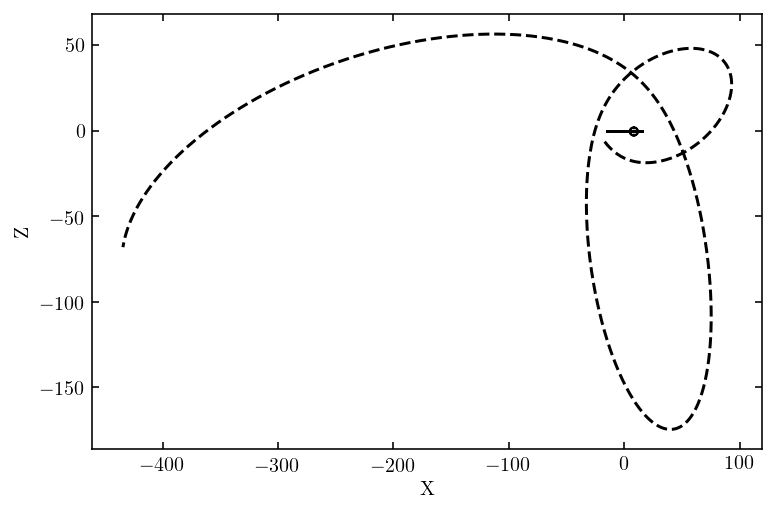

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( o_sgr_mop.x(times).value, o_sgr_mop.z(times).value, color='Black', linestyle='dashed' )
ax.scatter(o_sgr_mop.x(times_mop)[apocenter_indxs].value, 
           o_sgr_mop.z(times_mop)[apocenter_indxs].value, 
           color='Black' )
ax.plot([-15,15],[0,0], color='Black', linestyle='solid')
ax.scatter(8,0, marker=r'$\odot$', s=20, color='Black')
ax.set_xlabel('X')
ax.set_ylabel('Z')

fig.set_facecolor('White')

In [120]:
o_sgr_mop.vy(times_mop)

<Quantity [-34.26      , -33.97683406, -33.68524881, ...,  -7.13730151,
            -7.13558576,  -7.13386969] km / s>

In [121]:
o_sgr.vy(times)

<Quantity [-34.26      , -31.03813603, -26.94718682, -22.08709377,
           -16.72878564, -11.25903141,  -6.05376665,  -1.36883646,
             2.68712209,   6.11594298,   8.9783164 ,  11.35554575,
            13.32861098,  14.96930009,  16.33781123,  17.48326341,
            18.44523759,  19.25548883,  19.93950863,  20.51783081,
            21.00707074,  21.42075204,  21.76994804,  22.06378468,
            22.30982751,  22.51438408,  22.68274627,  22.81937814,
            22.92806185,  23.01202039,  23.07401421,  23.1164153 ,
            23.14127092,  23.15035371,  23.14520924,  23.12718193,
            23.0974489 ,  23.05704506,  23.00688328,  22.94777397,
            22.88043998,  22.80485437,  22.71977355,  22.6263988 ,
            22.53696605,  22.51978051,  22.40751556,  22.28215647,
            22.14921785,  22.00945384,  21.86324999,  21.71090518,
            21.55267927,  21.38880572,  21.21949724,  21.04494917,
            20.86534154,  20.68084061,  20.4916006 ,  20.29776